# Fashion MNIST

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Downloading and Loading data

In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring Data

In [54]:
type(fashion_mnist)

module

In [55]:
type(train_images)

numpy.ndarray

In [56]:
train_images.shape

(60000, 28, 28)

In [57]:
test_images.shape

(10000, 28, 28)

In [58]:
len(train_labels)

60000

In [59]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Label &emsp; Class<br>
0 &emsp;&emsp;&emsp;	T-shirt/top <br>
1 &emsp;&emsp;&emsp;	Trouser <br>
2 &emsp;&emsp;&emsp;	Pullover <br>
3 &emsp;&emsp;&emsp;	Dress <br>
4 &emsp;&emsp;&emsp;	Coat<br>
5 &emsp;&emsp;&emsp;	Sandal<br>
6 &emsp;&emsp;&emsp;	Shirt<br>
7 &emsp;&emsp;&emsp;	Sneaker<br>
8 &emsp;&emsp;&emsp;	Bag<br>
9 &emsp;&emsp;&emsp;	Ankle boot<br>

## Preprocessing the data

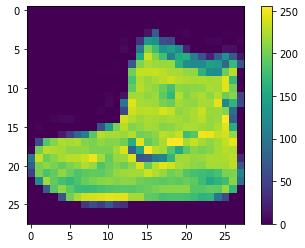

In [60]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [61]:
train_images = train_images / 255.0
test_images = test_images / 255.0

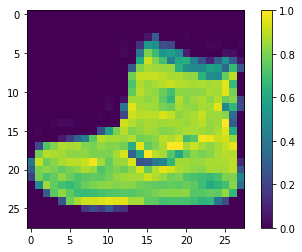

In [62]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

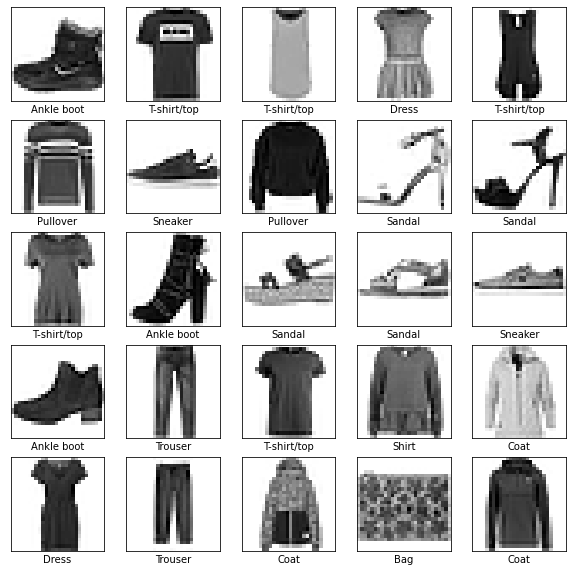

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building Model

### Setting up layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training Model

Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.

### Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [66]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4931 - accuracy: 0.8278
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3747 - accuracy: 0.8657
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3400 - accuracy: 0.8752
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3139 - accuracy: 0.8833s - loss: 0.312
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2962 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2805 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2680 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2581 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2475 - accuracy: 0.9086

### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [67]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3472 - accuracy: 0.8774

Test accuracy: 0.8774


### Make predictions
With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [68]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [69]:
predictions = probability_model.predict(test_images)

In [70]:
predictions[0]

array([1.8254060e-06, 1.2169349e-10, 7.4742239e-09, 8.5784872e-11,
       2.2547850e-08, 1.0637736e-03, 1.0008736e-06, 6.3427058e-03,
       2.9223086e-08, 9.9259067e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [71]:
np.argmax(predictions[0])

9

In [72]:
test_labels[0]

9

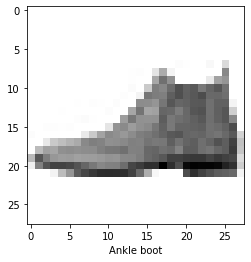

In [76]:
plt.grid(False)
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[0]])
plt.show()

In [77]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

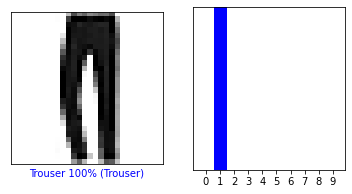

In [80]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

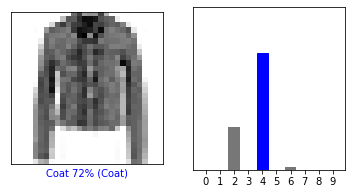

In [95]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

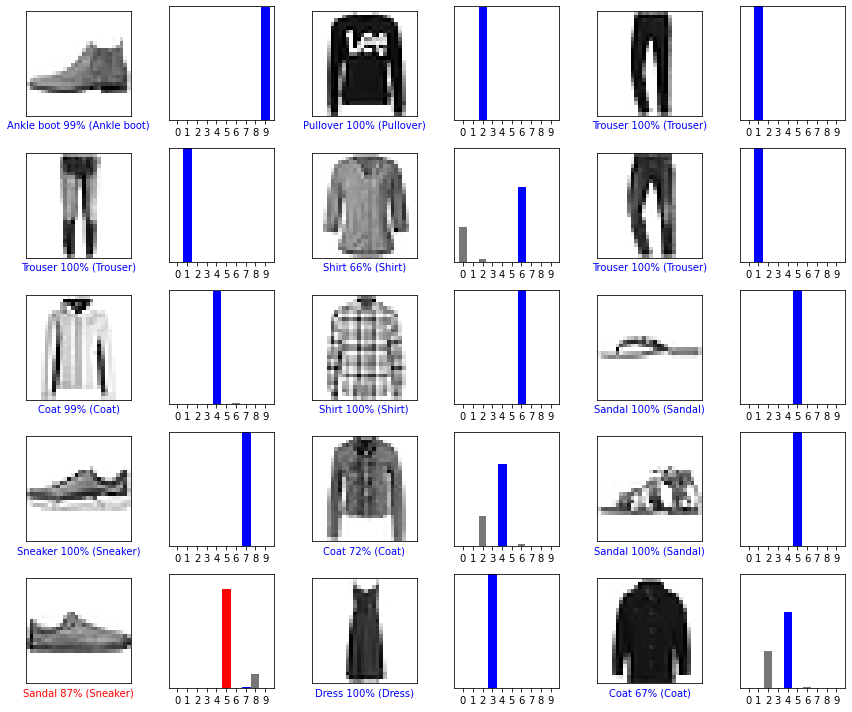

In [82]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [110]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [111]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [112]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.3902339e-05 2.4934908e-11 9.9865109e-01 2.7787657e-09 8.0640748e-04
  1.4923742e-15 5.1856658e-04 8.4480609e-18 4.1073561e-11 2.6226677e-15]]


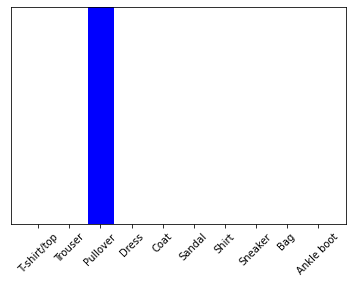

In [113]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [114]:
class_names[np.argmax(predictions_single[0])]

'Pullover'